# THÔNG TIN THÀNH VIÊN
<center>

| Họ tên | Mã số sinh viên | Email |
|:---:|:---:|:---:|
| Nguyễn Tất Trường | 19127082 | 19127082@student.hcmus.edu.vn |
| Nguyễn Hữu Tuấn | 19127083 | 19127082@student.hcmus.edu.vn |

</center>


``Đây là đồ án nhóm phục vụ cho môn học:`` ***Lập trình Khoa học dữ liệu*** .

# <center> ĐỒ ÁN CUỐI MÔN

# IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I. THU THẬP DỮ LIỆU 

- **Chủ đề của dữ liệu của bạn là gì? Và nguồn của dữ liệu của bạn?**  
Dữ liệu mà tụi mình tìm hiểu là dữ liệu của công ty Airbnb - một dịch vụ cho thuê nhà, căn hộ. Tụi mình đã sử dụng dữ liệu từ nguồn Kaggle, bạn có thể tham khảo dữ liệu [tại đây](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv).
- **Tác giả có cho phép bạn sử dụng dữ liệu? Kiểm tra về giấy phép của dữ liệu**  
Theo như nhóm chúng mình tìm hiểu, thì tập dữ liệu mà chúng mình chọn là tập dữ liệu công cộng, được phép sử dụng theo chuẩn ***CC0:Public Domain***.
- **Tác giả đã thu thập dữ liệu như thế nào?**
Đây là dữ liệu được thu thập của dịch vụ Airbnb trong năm 2019 tại thành phố New York. Dữ liệu liệt kê các thông tin về căn hộ được cho thuê, cũng như một số thông tin đánh giá về căn hộ.

# II. KHÁM PHÁ DỮ LIỆU

In [90]:
df = pd.read_csv('../AB_NYC_2019.csv', sep = ',')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- Bộ dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [91]:
rows = len(df)
cols = len(df.iloc[0])
rows, cols

(48895, 16)

Như vậy, bộ dữ liệu có tổng cộng 48895 dòng và 16 cột. Bây giờ, ta sẽ tìm hiểu ý nghĩa của các cột. Theo file mô tả của bộ dữ liệu, ta có được các ý nghĩa của các cột như sau:
- id: id của nơi ở được liệt kê
- name: tên của nơi ở được liệt kê
- host_id: tên của người sở hữu nơi ở được liệt kê
- neighborhood_group: tên của quận ở New York
- neighborhood: tên của một phường ở New York
- latitude: Vĩ độ của nơi ở được liệt kê
- longtitude: kinh độ của nơi ở được liệt kê
- room_type: loại phòng được thuê
- price: giá của từng nơi ở được liệt kê
- minimum_nights: số lượng đêm ngủ lại nhỏ nhất ở trong nơi ở được liệt kê
- number_of_reviews: lượng đánh giá, nhận xét của từng nơi ở được liệt kê
- last_review: ngày đánh giá cuối cùng của nơi ở được liệt kê
- reviews_per_month: Trung bình lượt review mỗi tháng
- calculated_host_listings_count: số lần mà mỗi chủ sỡ hữu sở hữu nơi ở được liệt kê
- availability_365: số ngày mà nơi ở được liệt kê có sẵn trong năm

Sau khi có được ý nghĩa của mỗi cột, ta sẽ tiến hành kiểm xem có dòng nào bị trùng không?

In [92]:
np.sum(df.duplicated(subset=None, keep="first")==True)

0

Như vậy, không có dòng nào bị lặp. Ta sẽ xem thử ý nghĩa của từng dòng. Từ dữ liệu của `df`, ta thấy rằng mỗi dòng dữ liệu cho biết tình trạng của một nơi ở, mỗi phần tử ứng với một cột ở trên.

Tiếp đến, ta sẽ tìm hiểu về kiểu dữ liệu của mỗi cột. 

In [93]:
a = lambda x: x.dtype
print(df.agg(a, axis=0))

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Dựa trên các dữ liệu ở trên, ta thấy có 3 kiểu dữ liệu chính:
- Đối với dữ liệu dạng `int64`: `id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365`. Như vậy, các dữ liệu dạng số nguyên không có vấn đề gì.
- Đối với dữ liệu dạng `float64`: `latitude, longitude, reviews_per_month`. Như vậy, dữ liệu dạng số thực cũng không có vấn đề gì.
- Đến với dữ liệu dạng `object`: `name, host_name, neighbourhood_group, neighbourhood, room_type, last_review`. Ta thấy rằng ngoài last_review, các cột dữ liệu còn lại đều là dạng string. Ta có thể sẽ chuyển cột last_review thành dạng datetime để dễ làm việc hơn.

In [94]:
df.describe(include=[np.number])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- Đối với các cột dữ liệu dạng số, ta sẽ cùng đi tìm hiểu:
  - Cột `id`: giá trị nhỏ nhất là 2539 và lớn nhất là 3648724 ... không có gì bất thường. Cột này có tổng dữ liệu là 48895 dòng, trùng với số dòng ở trên nên cũng không có giá trị bị thiếu.
  - Cột `host_id`: tương tự cột `id`, `host_id` kéo dài từ 2438 đến 27432130 và không bị thiếu dòng nào.
  - Cột `latitude` và `longitude`: dao động trong khoảng `(40.72, -73.95)` và không bị thiếu giá trị nào. Có vẻ hợp lí bởi ta chỉ xét riêng cho NewYork, nên giá trị kinh độ và vĩ độ sẽ bị lệch khá ít.
  - Cột `price`: nhỏ nhất là 0$ (free) và lớn nhất là 10000$. Mean là 152.72 và không bị thiếu dòng giá trị nào. Cột dữ liệu này cũng không có gì bất thường.
  - Cột `minimum_nights`: giá trị cho thuê nhỏ nhất của một nơi ở là 1 và lớn nhất là 1250 đêm. Điều này cũng có vẻ hợp lí, bởi đối với các nơi ở cho thuê ít nhất 1 đêm, đây có thể để phục vụ du lịch. Còn đối với nơi ở cho thuê ít nhất 1250 ngày, đây có thể là một cơ sở làm việc hay một toà nhà,... Cột này cũng không có giá trị bị thiếu.
  - Cột `number_of_reviews`: giá trị trong khoảng [0,629]. Có thể có một số nơi, lượt review là 0, và một số nơi phổ biến, lượt nhận xét là rất cao. Dữ liệu này cũng bình thường.
  - Cột `reviews_per_month`: cột này có giá trị nhỏ nhất là 0.01 và lớn nhất là 58.5. Ta thấy rằng, cột `number_of_reviews`, có một số nơi không có đánh giá nào và cột `reviews_per_month`, giá trị nhỏ nhất là một số khác 0. Tỉ lệ của cột này cũng khá cao, nên có thể suy ra rằng có một số nơi không được đánh giá nào thì cột này sẽ để trống. Ta sẽ điền các giá trị bị thiếu ở cột này ở mục tiền xử lí.
  - Cột `calculated_host_listings_count`, nhỏ nhất là 1 và lớn nhất là 327, số cột bị thiếu là 0. Cột này có vẻ không có gì bất thường.
  - Cuối cùng, cột `availability_365`, giá trị nhỏ nhất là 0, lớn nhất là 365. Không có cột nào bị thiếu. Dữ liệu ở cột này cũng phù hợp với số ngày trong năm.

In [95]:
df.describe(include=[object])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Cuối cùng, đối với các cột dữ liệu dạng chữ:
- Đối với cột `name`: Cột này bị thiếu 6 giá trị, có 47905 giá trị khác nhau, và có tới 18 tên Hillside Hotel. Bởi vì không có dòng nào bị lặp, nên đây có thể là một điểm bất thường.
- Cột `host_name`: có 11452 giá trị khác nhau và thiếu 11 giá trị. Host sở hữu nhiều nơi ở nhất là Michael, với 417 nơi ở. Có một số giá trị bị thiếu, đây có thể là do nơi ở đó không của host nào? Điều này khá bất hợp lí.
- Cột `neighborhood_group`: bộ dữ liệu chỉ xét trên 5 quận của New York, với Mahattan là quận có nhiều nơi ở nhất. Cột này cũng không có giá trị bị thiếu, và là cột khá bình thường.
- Cột `neighborhood`: cột này cũng không có giá trị bị thiếu và Williamsburg là phường có nhiều nơi ở nhất, với 3920 nơi ở.
- Cột `room_type`: không có giá trị bị thiếu, và cột này có 3 giá trị phân biệt. Điều này cũng không có gì bất thường.
- Và cuối cùng, cột `last_review`, số cột bị thiếu là khá cao và có 1764 giá trị phân biệt. Điều này khá hợp lí, bởi có thể một nơi ở nếu để lâu thì các giá trị này sẽ rải đều ra các năm, không chỉ riêng năm 2019. Cột last_review này cũng khá giống cột `reviews_per_month`, nên 2 cột này có gì đó liên quan đến nhau...

In [96]:
unq, count = np.unique(df['id'], return_counts=True)
df.loc[df['name'] == 'Hillside Hotel']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaN,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaN,NaN,18,355


# III. ĐẶT RA CÁC CÂU HỎI HỮU ÍCH

Sau khi ta đã khám phá và có những hiểu biết sơ lược về dữ liệu, tiếp theo ta sẽ đặt ra các câu hỏi nhằm mục đích phân tích, tìm tòi các thông tin hữu ích mà ta có thể tận dụng trong các công việc kinh doanh:
- Giá nhà trung bình ở các khu dân cư ở thành phố New York có sự chênh lệch theo thời gian như thế nào ?
- Với từng loại phòng, ta nên chọn khu vực nào để thuê?
- Trong năm 2019, thì top 10 chủ nhà nào ở New York `được phản hồi nhiều nhất`?
- Giả sử ta có chuyến công tác trong vòng 10 ngày ở thành phố New York, thì ta nên chọn nhà của host nào là lợi cho mình nhất?

# IV. TIỀN XỬ LÝ DỮ LIỆU

### Chuyển đổi dtype cho cột last review

In [97]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [98]:
df['last_review']

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

Dựa vào phần khám phá dữ liệu, ta thấy rằng tồn tại những khác sạn có trùng tên và có vị trí ở các neigborhood khác nhau. Chính điều này sẽ gây ra việc trùng lặp.
Hơn nữa, có những mẫu, mặc dù cùng mô tả về cùng 1 địa điểm nhưng lại tồn tại nhiều lần. Thế nên, ta cần xử lí trùng lắp.

Trước hết, ta sẽ lấy các mẫu có cùng tên để xem xét.

In [99]:
duplicated_name = df['name'].value_counts().loc[lambda x: x>1]
duplicated_name

Hillside Hotel                            18
Home away from home                       17
New york Multi-unit building              16
Brooklyn Apartment                        12
Loft Suite @ The Box House Hotel          11
                                          ..
Cosy room in Williamsburg                  2
Cozy apartment in Williamsburg             2
Pleasant 1BR in Midtown East by Sonder     2
Gorgeous Bushwick Townhome                 2
Spacious Studio in Midtown                 2
Name: name, Length: 645, dtype: int64

Ta sẽ xóa các mẫu dựa có cùng tên, cùng neighbourhood và neighbourhood_group.

In [100]:
df= df.drop_duplicates(subset=['name','neighbourhood','neighbourhood_group'])

### XỬ LÝ CÁC CỘT BỊ THIẾU DỮ LIỆU

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48299 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48299 non-null  int64         
 1   name                            48285 non-null  object        
 2   host_id                         48299 non-null  int64         
 3   host_name                       48278 non-null  object        
 4   neighbourhood_group             48299 non-null  object        
 5   neighbourhood                   48299 non-null  object        
 6   latitude                        48299 non-null  float64       
 7   longitude                       48299 non-null  float64       
 8   room_type                       48299 non-null  object        
 9   price                           48299 non-null  int64         
 10  minimum_nights                  48299 non-null  int64         
 11  nu

Đối với cột name, như đã thấy ở phần khám phá dữ liệu, dữ liệu tồn tại các mẫu không có tên cho địa điểm, điều này cũng không có gì quá bất thường, và đối với các mẫu này ta không cần thiết phải lấp vào. Bởi lẽ, việc làm đầy dữ liệu cột này là không hiệu quả.

Đối với cột `host_name`, ta có điền dữ liệu dựa trên các mẫu có cùng host_id, tuy nhiên khi kiểm tra sơ lược thì ta thấy các host_id này chỉ xuất hiện 1 lần, thế nên việc điền dữ liệu thiếu này cũng không khả thi.

In [102]:
df['host_name']= df.groupby(['host_id'])['host_name'].ffill()
df['host_name'].count()
df = df.dropna(subset=['host_name'])

Đối với cột `last_review`, dữ liệu cột này cần tính xác thực, thế nên ta không cần phải làm đầy. Cuối cùng là cột `reviews_per_month`, ta sẽ điền giá trị 0 cho các mẫu bị thiếu.

In [103]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# V. TRẢ LỜI CÁC CÂU HỎI

### **Giá nhà trung bình ở các khu dân cư ở thành phố New York có sự chênh lệch theo thời gian như thế nào ?**

Để trả lời cho câu hỏi này, ta sẽ thực hiện các bước như sau:

- Bước 1: Ta sẽ lấy dữ liệu của cột `neigbourhood_group`,`year` tách từ `last_review` và `price` từ dataframe ban đầu. Từ dữ liệu này, sẽ sẽ gom theo và tính trung bình theo từng khu vực.
- Bước 2: Khi có được kết quả, ta sẽ biểu đồ cột để trực quan hóa, với trục hoành là các khu vực, trục tung là giá trung bình.

In [112]:
price_by_neighbour = df[['neighbourhood_group','price','last_review']]
price_by_neighbour = price_by_neighbour.groupby([price_by_neighbour['neighbourhood_group'],price_by_neighbour['last_review'].dt.year]).agg(np.mean)
price_by_neighbour =price_by_neighbour.reset_index()
price_by_neighbour.columns =['neighbourhood_group','year','price']

Code bước 2

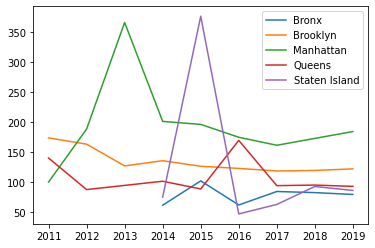

In [113]:
Bronx = price_by_neighbour[price_by_neighbour['neighbourhood_group']=='Bronx']
Brooklyn = price_by_neighbour[price_by_neighbour['neighbourhood_group']=='Brooklyn']
Manhattan = price_by_neighbour[price_by_neighbour['neighbourhood_group']=='Manhattan']
Queens = price_by_neighbour[price_by_neighbour['neighbourhood_group']=='Queens']
Staten_Island = price_by_neighbour[price_by_neighbour['neighbourhood_group']=='Staten Island']
plt.plot(Bronx['year'],Bronx['price'])
plt.plot(Brooklyn['year'],Brooklyn['price'])
plt.plot(Manhattan['year'],Manhattan['price'])
plt.plot(Queens['year'],Queens['price'])
plt.plot(Staten_Island['year'],Staten_Island['price'])
plt.legend(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])

### **Trong năm 2019, thì top 10 chủ nhà nào ở New York `được phản hồi nhiều nhất`?**

Để trả lời câu hỏi trên, ta cần phân tích những ý sau đây:
- Bước 1: Trước hết, `được phản hồi` ở đây nghĩa là **có sự phản hồi từ khách hàng**. Ta sẽ sử dụng các thuộc tính review_per_months, host_id, host của năm 2019 để có thể tính tổng review theo từng host.
- Bước 2: Sau khi có dữ liệu ta sữ dụng biểu đồ cột ngang để trực quan hóa. 

In [114]:
busy_host = df[df['last_review'].dt.year == 2019]
busy_host = busy_host[['host_id','host_name','reviews_per_month']]
busy_host = busy_host.groupby(['host_id','host_name']).agg(sum)
busy_host = busy_host.reset_index()
busy_host = busy_host.sort_values(by='reviews_per_month',ascending=False)[:10]

Code bước 2

Text(0.5, 0, 'Reviews_per_month')

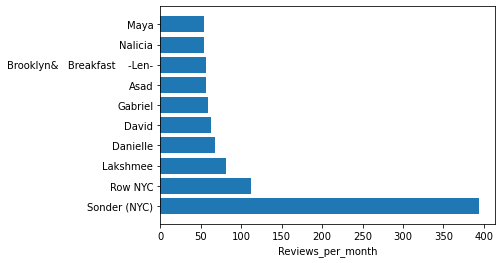

In [115]:
plt.barh(busy_host['host_name'],busy_host['reviews_per_month'])
plt.xlabel("Reviews_per_month")